In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hugomathien/soccer")

print("Path to dataset files:", path)

100%|██████████| 32.7M/32.7M [00:01<00:00, 23.9MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/hugomathien/soccer/versions/10


In [2]:
import os

# Path ke folder dataset
dataset_path = "/root/.cache/kagglehub/datasets/hugomathien/soccer/versions/10"

# Cek file yang ada dalam folder tersebut
os.listdir(dataset_path)

['database.sqlite']

In [3]:
import sqlite3
import pandas as pd

# Koneksi ke database SQLite
db_path = "/root/.cache/kagglehub/datasets/hugomathien/soccer/versions/10/database.sqlite"
conn = sqlite3.connect(db_path)

# Lihat daftar tabel dalam database
tables = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)
print(tables)

                name
0    sqlite_sequence
1  Player_Attributes
2             Player
3              Match
4             League
5            Country
6               Team
7    Team_Attributes


In [4]:
# Query untuk mendapatkan ID Chelsea dari tabel Team
team_query = "SELECT team_api_id FROM Team WHERE team_long_name = 'Chelsea'"
chelsea_id = pd.read_sql(team_query, conn).iloc[0, 0]

# Query untuk mendapatkan semua pertandingan Chelsea (home & away)
match_query = f"""
SELECT * FROM Match
WHERE home_team_api_id = {chelsea_id} OR away_team_api_id = {chelsea_id}
"""
chelsea_matches = pd.read_sql(match_query, conn)

# Tampilkan beberapa baris pertama
chelsea_matches.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1738,1729,1729,2008/2009,1,2008-08-17 00:00:00,489051,8455,8462,4,...,10.00,1.33,5.0,11.00,1.33,4.75,9.00,1.33,4.20,10.00
1,1743,1729,1729,2008/2009,10,2008-10-29 00:00:00,489136,8667,8455,0,...,1.44,7.00,4.6,1.45,7.00,4.00,1.45,7.00,4.00,1.44
2,1758,1729,1729,2008/2009,11,2008-11-01 00:00:00,489151,8455,8472,5,...,13.00,1.20,6.7,15.00,1.20,6.00,15.00,1.17,6.50,13.00
3,1765,1729,1729,2008/2009,12,2008-11-09 00:00:00,489158,8655,8455,0,...,1.50,6.50,4.4,1.50,7.25,4.00,1.48,7.50,4.00,1.44
4,1777,1729,1729,2008/2009,13,2008-11-15 00:00:00,489170,8659,8455,0,...,1.30,9.00,4.5,1.30,10.00,5.00,1.30,10.00,4.75,1.29


In [42]:
# Cek rentang musim dalam dataset Chelsea
season_range = chelsea_matches["season"].min(), chelsea_matches["season"].max()
season_range

('2008/2009', '2015/2016')

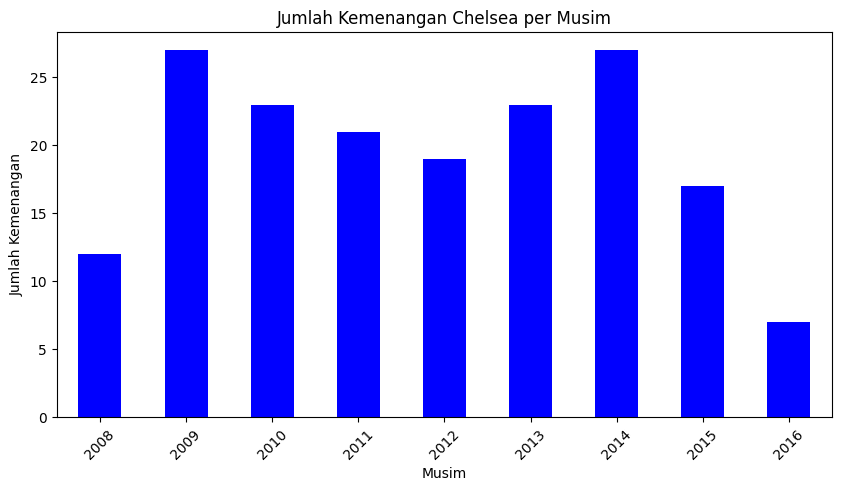

In [6]:
import matplotlib.pyplot as plt

# Konversi tanggal ke format datetime
chelsea_matches['date'] = pd.to_datetime(chelsea_matches['date'])

# Tambahkan kolom musim
chelsea_matches['season'] = chelsea_matches['date'].dt.year

# Hitung jumlah kemenangan Chelsea per musim
chelsea_wins = (
    chelsea_matches
    .assign(win=lambda df: ((df['home_team_goal'] > df['away_team_goal']) & (df['home_team_api_id'] == chelsea_id)) |
                            ((df['away_team_goal'] > df['home_team_goal']) & (df['away_team_api_id'] == chelsea_id)))
    .groupby('season')['win'] #Fixed indentation to be in line with assign
    .sum()
)

# Plot hasilnya
plt.figure(figsize=(10,5))
chelsea_wins.plot(kind="bar", color="blue")
plt.title("Jumlah Kemenangan Chelsea per Musim")
plt.xlabel("Musim")
plt.ylabel("Jumlah Kemenangan")
plt.xticks(rotation=45)
plt.show()

In [11]:
print(chelsea_matches.columns.tolist())

['id', 'country_id', 'league_id', 'season', 'stage', 'date', 'match_api_id', 'home_team_api_id', 'away_team_api_id', 'home_team_goal', 'away_team_goal', 'home_player_X1', 'home_player_X2', 'home_player_X3', 'home_player_X4', 'home_player_X5', 'home_player_X6', 'home_player_X7', 'home_player_X8', 'home_player_X9', 'home_player_X10', 'home_player_X11', 'away_player_X1', 'away_player_X2', 'away_player_X3', 'away_player_X4', 'away_player_X5', 'away_player_X6', 'away_player_X7', 'away_player_X8', 'away_player_X9', 'away_player_X10', 'away_player_X11', 'home_player_Y1', 'home_player_Y2', 'home_player_Y3', 'home_player_Y4', 'home_player_Y5', 'home_player_Y6', 'home_player_Y7', 'home_player_Y8', 'home_player_Y9', 'home_player_Y10', 'home_player_Y11', 'away_player_Y1', 'away_player_Y2', 'away_player_Y3', 'away_player_Y4', 'away_player_Y5', 'away_player_Y6', 'away_player_Y7', 'away_player_Y8', 'away_player_Y9', 'away_player_Y10', 'away_player_Y11', 'home_player_1', 'home_player_2', 'home_player_

In [15]:
chelsea_matches['possession'] = pd.to_numeric(chelsea_matches['possession'], errors='coerce')
chelsea_matches['shoton'] = pd.to_numeric(chelsea_matches['shoton'], errors='coerce')
chelsea_matches['shotoff'] = pd.to_numeric(chelsea_matches['shotoff'], errors='coerce')

In [17]:
print(chelsea_matches[['chelsea_possession', 'chelsea_shoton', 'chelsea_win']].isna().sum())

chelsea_possession    304
chelsea_shoton        304
chelsea_win             0
dtype: int64


In [21]:
# Cek jumlah total baris dalam dataset
total_rows = len(chelsea_matches)

# Cek jumlah missing values (NaN) di setiap kolom
missing_values = chelsea_matches.isnull().sum()

# Buat DataFrame untuk melihat jumlah data yang tersedia dan persentase missing values
missing_df = pd.DataFrame({
    "Total Data": total_rows - missing_values,
    "Missing Data": missing_values,
    "Missing %": (missing_values / total_rows) * 100
})

# Tampilkan DataFrame
print(missing_df)

                    Total Data  Missing Data  Missing %
season                     304             0        0.0
home_team_api_id           304             0        0.0
away_team_api_id           304             0        0.0
home_team_goal             304             0        0.0
away_team_goal             304             0        0.0
shoton                       0           304      100.0
shotoff                      0           304      100.0
possession                   0           304      100.0
chelsea_win                304             0        0.0
chelsea_possession           0           304      100.0
chelsea_shoton               0           304      100.0


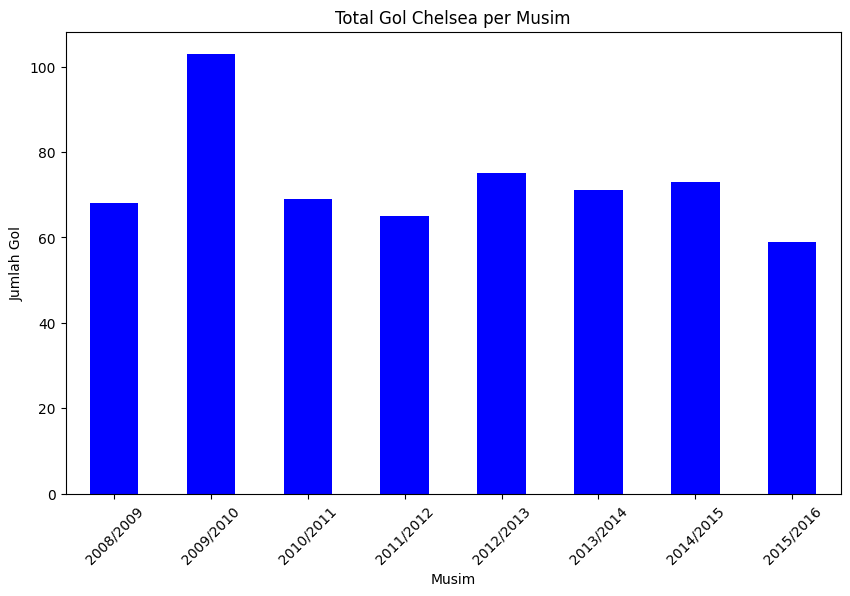

In [29]:
import seaborn as sns

# Analisis Jumlah Gol Chelsea dalam Setiap Musim

# Tambahkan kolom total gol Chelsea dalam setiap pertandingan
chelsea_matches['chelsea_goals'] = chelsea_matches.apply(
    lambda x: x['home_team_goal'] if x['home_team_api_id'] == chelsea_id else x['away_team_goal'], axis=1)

# Hitung total gol Chelsea per musim
chelsea_goals_per_season = chelsea_matches.groupby('season')['chelsea_goals'].sum()

# Visualisasi: Bar Chart Jumlah Gol Chelsea per Musim
plt.figure(figsize=(10, 6))
chelsea_goals_per_season.plot(kind='bar', color='blue')
plt.title("Total Gol Chelsea per Musim")
plt.xlabel("Musim")
plt.ylabel("Jumlah Gol")
plt.xticks(rotation=45)
plt.show()

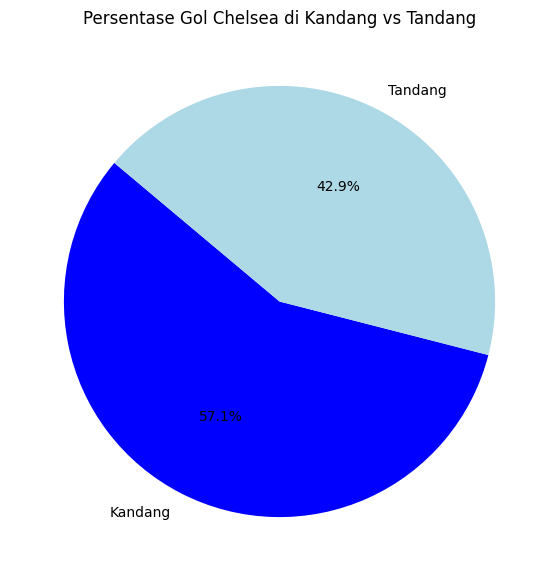

In [28]:
# 2. Performa Chelsea Saat Bermain di Kandang vs Tandang

# Hitung jumlah gol Chelsea saat bermain di kandang dan tandang
chelsea_home_goals = chelsea_matches[chelsea_matches['home_team_api_id'] == chelsea_id]['home_team_goal'].sum()
chelsea_away_goals = chelsea_matches[chelsea_matches['away_team_api_id'] == chelsea_id]['away_team_goal'].sum()

# Visualisasi: Pie Chart Perbandingan Gol Kandang vs Tandang
plt.figure(figsize=(7, 7))
plt.pie([chelsea_home_goals, chelsea_away_goals], labels=['Kandang', 'Tandang'],
        autopct='%1.1f%%', colors=['blue', 'lightblue'], startangle=140)
plt.title("Persentase Gol Chelsea di Kandang vs Tandang")
plt.show()

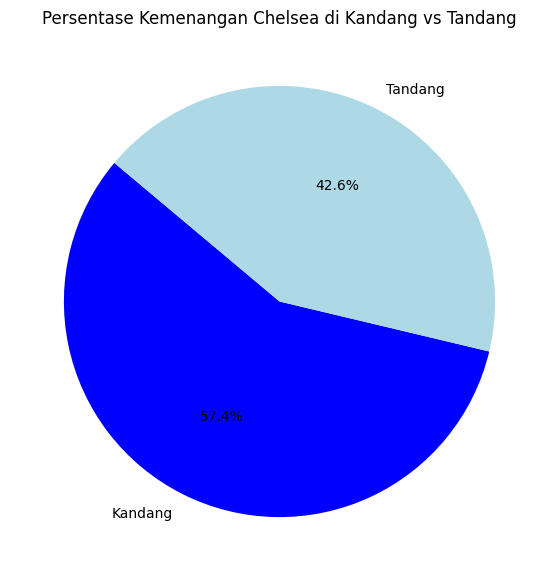

In [27]:
# Hitung jumlah kemenangan Chelsea saat bermain di kandang dan tandang
chelsea_home_wins = chelsea_matches[(chelsea_matches['chelsea_win'] == True) &
                                    (chelsea_matches['home_team_api_id'] == chelsea_id)].shape[0]
chelsea_away_wins = chelsea_matches[(chelsea_matches['chelsea_win'] == True) &
                                    (chelsea_matches['away_team_api_id'] == chelsea_id)].shape[0]

# Visualisasi: Pie Chart Perbandingan Kemenangan Kandang vs Tandang
plt.figure(figsize=(7, 7))
plt.pie([chelsea_home_wins, chelsea_away_wins], labels=['Kandang', 'Tandang'],
        autopct='%1.1f%%', colors=['blue', 'lightblue'], startangle=140)
plt.title("Persentase Kemenangan Chelsea di Kandang vs Tandang")
plt.show()

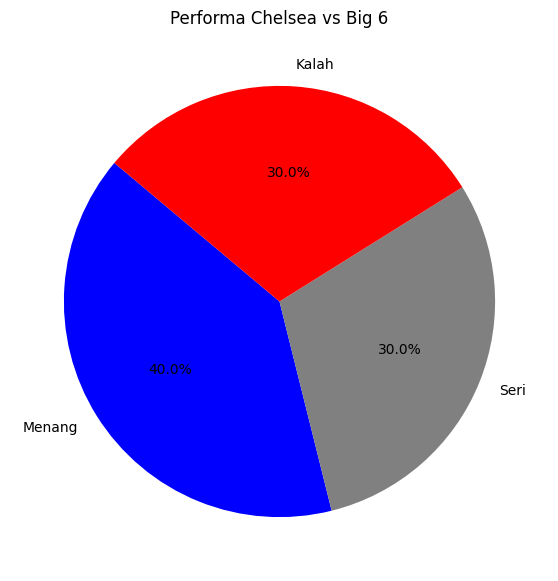

In [38]:
# Daftar tim "Big 6" di Premier League
big_6_teams = ["Manchester United", "Manchester City", "Arsenal", "Liverpool", "Tottenham Hotspur"]

# Ambil ID tim Big 6 dari database
big_6_team_ids = teams_df[teams_df["team_long_name"].isin(big_6_teams)]["team_api_id"].tolist()

# Filter pertandingan Chelsea vs tim Big 6
chelsea_vs_big6 = chelsea_matches[
    (chelsea_matches["home_team_api_id"].isin(big_6_team_ids)) |
    (chelsea_matches["away_team_api_id"].isin(big_6_team_ids))
].copy()

# Tentukan apakah Chelsea menang dalam setiap pertandingan vs Big 6
chelsea_vs_big6["chelsea_win"] = ((chelsea_vs_big6["home_team_goal"] > chelsea_vs_big6["away_team_goal"]) &
                                  (chelsea_vs_big6["home_team_api_id"] == chelsea_id)) | \
                                 ((chelsea_vs_big6["away_team_goal"] > chelsea_vs_big6["home_team_goal"]) &
                                  (chelsea_vs_big6["away_team_api_id"] == chelsea_id))

# Tambahkan kolom nama lawan
chelsea_vs_big6["opponent"] = chelsea_vs_big6.apply(
    lambda x: teams_df[teams_df["team_api_id"] == x["home_team_api_id"]]["team_long_name"].values[0]
    if x["away_team_api_id"] == chelsea_id else teams_df[teams_df["team_api_id"] == x["away_team_api_id"]]["team_long_name"].values[0],
    axis=1
)

# Hitung jumlah kemenangan, seri, dan kekalahan Chelsea melawan tim Big 6
chelsea_wins_big6 = chelsea_vs_big6[chelsea_vs_big6["chelsea_win"] == True].shape[0]
chelsea_draws_big6 = chelsea_vs_big6[chelsea_vs_big6["home_team_goal"] == chelsea_vs_big6["away_team_goal"]].shape[0]
chelsea_losses_big6 = chelsea_vs_big6.shape[0] - (chelsea_wins_big6 + chelsea_draws_big6)

# Visualisasi: Pie Chart Performa Chelsea vs Big 6
plt.figure(figsize=(7, 7))
plt.pie([chelsea_wins_big6, chelsea_draws_big6, chelsea_losses_big6], labels=["Menang", "Seri", "Kalah"],
        autopct='%1.1f%%', colors=['blue', 'gray', 'red'], startangle=140)
plt.title("Performa Chelsea vs Big 6")
plt.show()

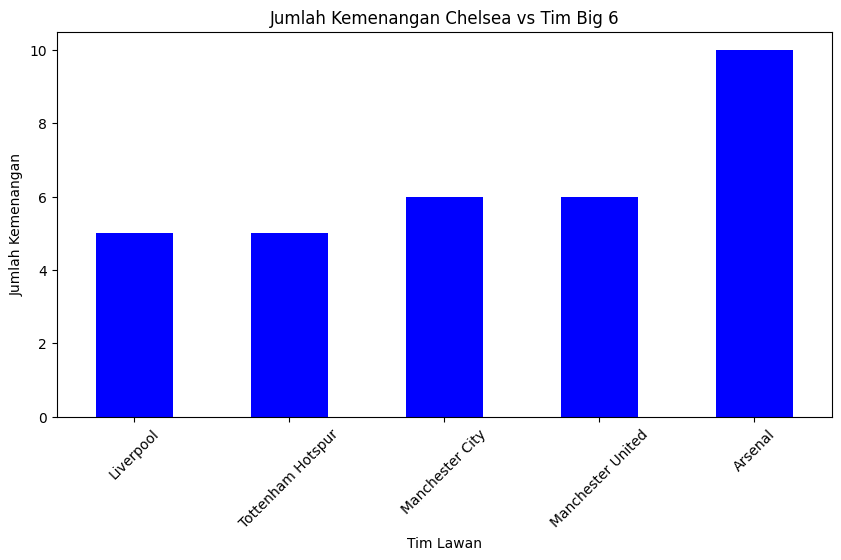

In [39]:
# Bar Chart: Jumlah Kemenangan Chelsea vs Setiap Tim Big 6
chelsea_results_vs_each_big6 = chelsea_vs_big6.groupby("opponent")["chelsea_win"].sum()

plt.figure(figsize=(10, 5))
chelsea_results_vs_each_big6.sort_values().plot(kind="bar", color="blue")
plt.title("Jumlah Kemenangan Chelsea vs Tim Big 6")
plt.xlabel("Tim Lawan")
plt.ylabel("Jumlah Kemenangan")
plt.xticks(rotation=45)
plt.show()